# SMS Classification

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## load dataset

In [3]:
df = pd.read_table("D:\\Machine Learning Journey\\ML projects\\SMS Spam or Ham\\dataset\\SMSSpamCollection", sep="\t", header=None, names=["labels", "sms"])

## view dataset

In [5]:
df.head(10)

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
len(df)

5572

In [4]:
df.labels.unique()

array(['ham', 'spam'], dtype=object)

## label encoding

In [5]:
# labelling spam to 1 and ham to 0
df["labels"] = df.labels.map({"ham" : 0, "spam" : 1})

In [6]:
df.head()

,labels,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## analyzing data distribution

<Axes: xlabel='labels', ylabel='Count'>

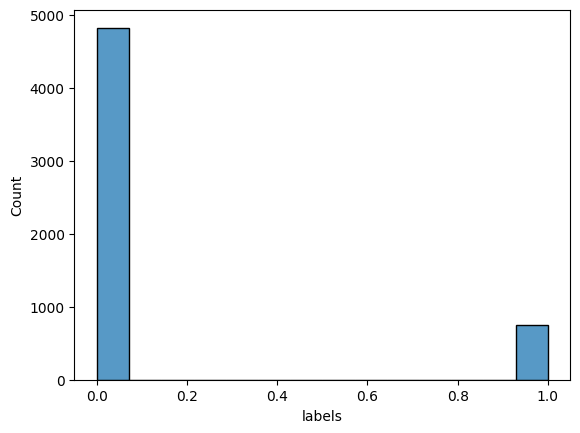

In [8]:
sns.histplot(x="labels", data=df)

In [9]:
df["labels"].value_counts()

labels
0    4825
1     747
Name: count, dtype: int64

In [15]:
df1 = df[df['labels'] != 0]

In [16]:
df1.head()

,labels,sms
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [18]:
df1["labels"].value_counts()

labels
1    747
Name: count, dtype: int64

In [19]:
df2 = df[df['labels'] != 1]

In [20]:
df2.head()

,labels,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...


In [21]:
df2["labels"].value_counts()

labels
0    4825
Name: count, dtype: int64

In [23]:
merged_df = pd.concat([df1, df2.head(747)], ignore_index=True)

In [24]:
merged_df.head()

,labels,sms
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,FreeMsg Hey there darling it's been 3 week's n...
2,1,WINNER!! As a valued network customer you have...
3,1,Had your mobile 11 months or more? U R entitle...
4,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [25]:
merged_df["labels"].value_counts()

labels
1    747
0    747
Name: count, dtype: int64

## splitting data into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(merged_df["sms"],merged_df["labels"], train_size=0.8)

In [27]:
X_train.shape

(1195,)

### converting text data into numerical data


In [28]:
# creating object
count_vector = CountVectorizer()

In [29]:
train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)

## training model

In [ ]:
# creating model object
model = MultinomialNB()

In [34]:
model.fit(train, Y_train)

MultinomialNB()

In [35]:
prediction = model.predict(test)

## Evaluating the model

In [39]:
score = accuracy_score(Y_test, prediction)

In [40]:
score

0.9364548494983278

In [ ]:
import joblib

joblib.dump(model, 'spam_or_ham.pkl')


['spam_or_ham.pkl']

In [46]:
loaded_model = joblib.load('spam_or_ham.pkl')

In [50]:
joblib.dump(count_vector, "vectorizer.pkl")

['vectorizer.pkl']

In [51]:
vectorizer = joblib.load("vectorizer.pkl")